# **Introdução**

Este projeto tem como objetivo analisar e modelar um conjunto de dados contendo informações sobre séries de TV, incluindo popularidade, número de votos, idioma original, país de origem, gênero e notas (rating). A ideia central é entender quais variáveis têm maior impacto no rating das séries e avaliar diferentes modelos preditivos para estimar esse valor com base nos atributos disponíveis.

# **Objetivo do Projeto**
O objetivo principal é prever o rating das séries utilizando técnicas de regressão e classificação. Para isso, o trabalho envolve:

*   exploração e limpeza dos dados
*   construção de modelos de regressão
*   validação dos resultados utilizando métricas apropriadas
*   seleção do melhor modelo final por meio de otimização


# **Hipótese do Projeto**

A hipótese inicial é que variáveis como popularidade, quantidade de votos, ano de lançamento e gênero influenciam o rating das séries.
A ideia é verificar, por meio dos modelos, se realmente existe relação entre essas variáveis e a nota final atribuída à série pelo público.

# **Fonte do Dataset**

O dataset utilizado foi conseguido na plataforma Kaggle pelo criador Raveennimbiwal

# **Licença e Uso dos Dados**

Os dados foram utilizados somente para fins educacionais, dentro do contexto da disciplina de Modelagem. Não há fins comerciais, redistribuição pública ou uso indevido do conteúdo.

link: https://www.kaggle.com/datasets/raveennimbiwal/top-rated-tv-shows-dataset-global-2025

Este projeto utiliza um dataset público sem informações pessoais, respeitando integralmente a licença do Kaggle e boas práticas éticas no uso de dados.


# **Preparando o ambiente pro python 3.10**

Run the first cell, reload(CTRL + R), then run the second cell

In [ ]:
!wget https://github.com/korakot/kora/releases/download/v0.10/py310.sh
!bash ./py310.sh -b -f -p /usr/local
!python -m ipykernel install --name "py310" --user

--2025-12-11 11:06:23--  https://github.com/korakot/kora/releases/download/v0.10/py310.sh
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/266951884/0d0623be-3dec-4820-9e7b-69a3a5a75ef7?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-11T11%3A46%3A49Z&rscd=attachment%3B+filename%3Dpy310.sh&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-11T10%3A46%3A33Z&ske=2025-12-11T11%3A46%3A49Z&sks=b&skv=2018-11-09&sig=fzG7o5XA6mL0loUAFrfro72EbFeBDcjQrFTudRJBi8E%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2NTQ1NDc4MywibmJmIjoxNzY1NDUxMTgzLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLmNvcmUud2luZG93cy5u

In [ ]:
import sys
print("version:", sys.version)

version: 3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:35:26) [GCC 10.4.0]


In [ ]:
!pip install pycaret[full] seaborn statsmodels scikit-learn pandas matplotlib

# **Instalando dependências**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm


# **Carregando Dataset**

In [ ]:
df = pd.read_csv('/content/top_rated_2000webseries.csv')
df.head()


,id,title,original_title,overview,premiere_date,popularity,genre,country_origin,original_language,rating,votes
0,1,Breaking Bad,Breaking Bad,"Walter White, a New Mexico chemistry teacher, ...",2008-01-20,108.7820,"Drama, Crime",United States,English,8.900,16556
1,2,Avatar: The Last Airbender,Avatar: The Last Airbender,"In a war-torn world of elemental magic, a youn...",2005-02-21,12.5347,"Animation, Action & Adventure, Sci-Fi & Fantasy",United States,English,8.800,4557
2,3,Arcane,Arcane,Amid the stark discord of twin cities Piltover...,2021-11-06,22.5739,"Animation, Sci-Fi & Fantasy, Drama, Action & A...",United States,English,8.800,5481
3,4,When Life Gives You Tangerines,폭싹 속았수다,"In Jeju, a spirited girl and a steadfast boy's...",2025-03-07,18.5771,Drama,South Korea,Korean,8.751,423
4,5,Frieren: Beyond Journey's End,葬送のフリーレン,Decades after her party defeated the Demon Kin...,2023-09-29,28.3761,"Animation, Action & Adventure, Drama, Sci-Fi &...",Japan,Japanese,8.735,565


# **Teste de schema**

In [ ]:

expected_cols = [
    'id', 'title', 'original_title', 'overview',
    'premiere_date', 'popularity', 'genre',
    'country_origin', 'original_language',
    'rating', 'votes'
]

assert list(df.columns) == expected_cols, "Erro: o schema do dataset não corresponde ao esperado!"
print("Teste de schema aprovado!.")


Teste de schema aprovado!.


# **Inspeção inicial**

In [ ]:
df.info()
df.describe(include="all")
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   title              2000 non-null   object 
 2   original_title     2000 non-null   object 
 3   overview           1980 non-null   object 
 4   premiere_date      2000 non-null   object 
 5   popularity         2000 non-null   float64
 6   genre              2000 non-null   object 
 7   country_origin     1999 non-null   object 
 8   original_language  2000 non-null   object 
 9   rating             2000 non-null   float64
 10  votes              2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


id                    0
title                 0
original_title        0
overview             20
premiere_date         0
popularity            0
genre                 0
country_origin        1
original_language     0
rating                0
votes                 0
dtype: int64

Identificamos 20 valores ausentes na coluna overview e 1 na country_origin

# **Tratamento de valores ausentes**

In [ ]:
df['overview'] = df['overview'].fillna("No overview")

df['country_origin'] = df['country_origin'].fillna(df['country_origin'].mode()[0])

df.isnull().sum()


id                   0
title                0
original_title       0
overview             0
premiere_date        0
popularity           0
genre                0
country_origin       0
original_language    0
rating               0
votes                0
dtype: int64

O dataset apresentava 20 valores ausentes em 'overview' e 1 valor ausente em 'country_origin'. Valor faltante foi removido, preservando a consistência das variáveis categóricas.

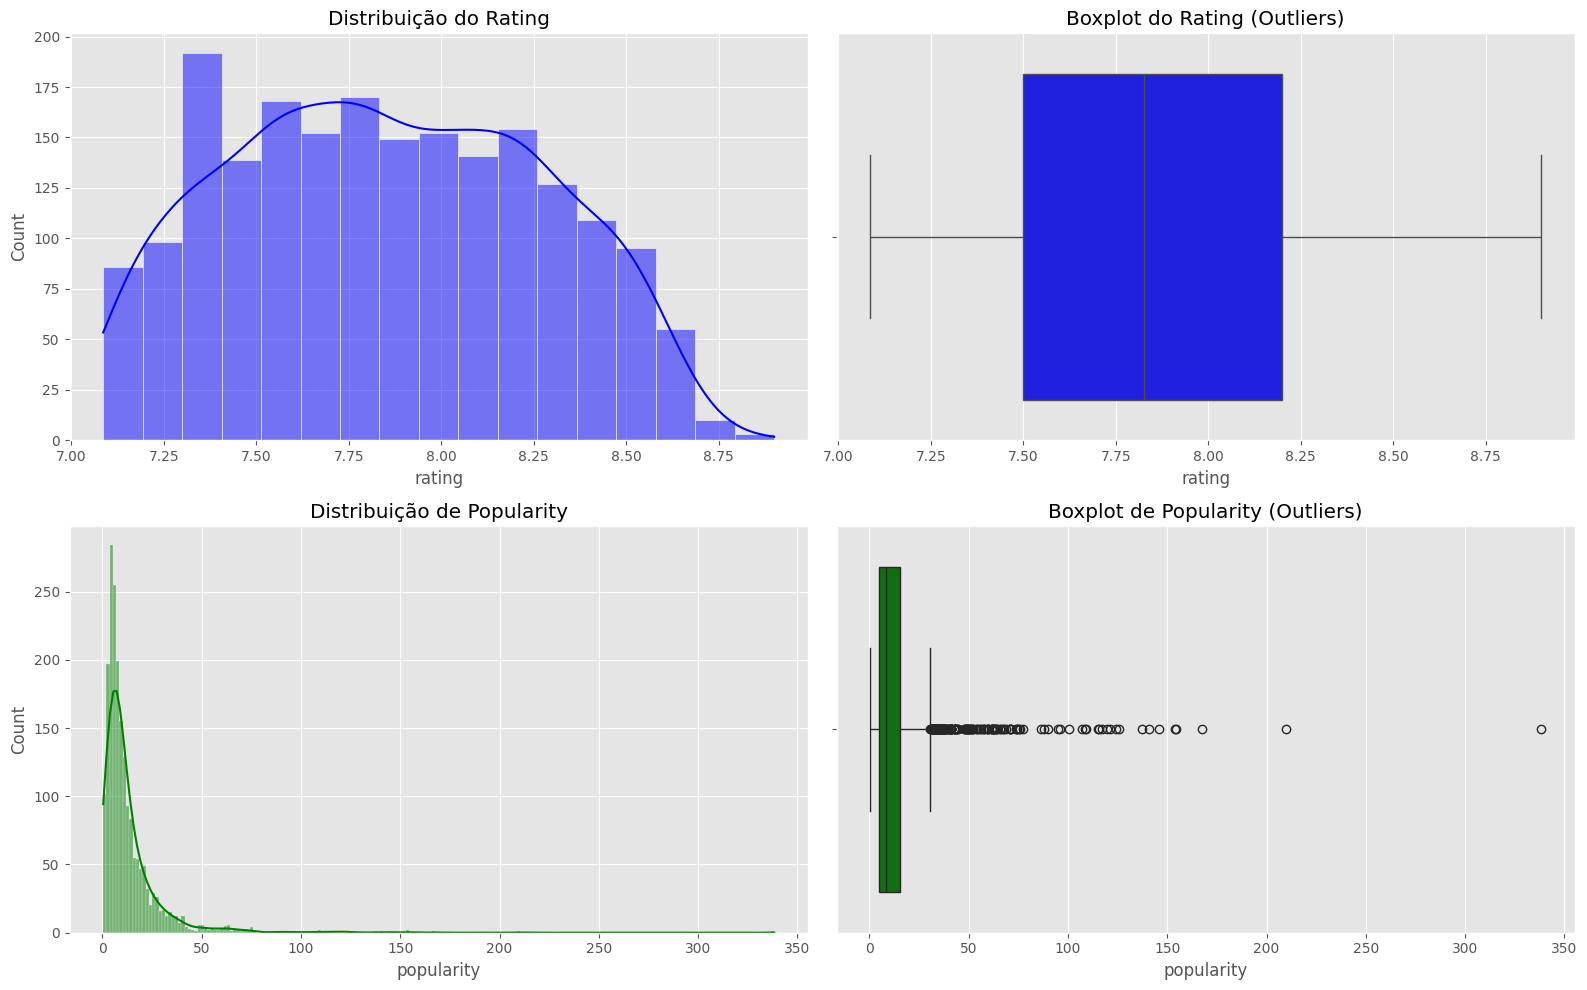

In [ ]:
plt.style.use("ggplot")

# Figura maior
plt.figure(figsize=(16,10))

# --------------------------
# Rating
# --------------------------
plt.subplot(2,2,1)
sns.histplot(df['rating'], kde=True, color='blue')
plt.title("Distribuição do Rating")

plt.subplot(2,2,2)
sns.boxplot(x=df['rating'], color='blue')
plt.title("Boxplot do Rating (Outliers)")


# --------------------------
# Popularity
# --------------------------
plt.subplot(2,2,3)
sns.histplot(df['popularity'], kde=True, color='green')
plt.title("Distribuição de Popularity")

plt.subplot(2,2,4)
sns.boxplot(x=df['popularity'], color='green')
plt.title("Boxplot de Popularity (Outliers)")

plt.tight_layout()
plt.show()

**Analise de Rating**

A distribuição do rating, dá pra ver que ela é bem estável. A maior parte das séries fica entre 7.4 e 8.2, sem nenhum valor absurdo fora do padrão.

Isso é bom porque significa que o rating não oscila tanto e não tem nenhum ponto estranho puxando o modelo para algum lado. Ou seja, dá pra trabalhar bem com ele nos modelos de regressão.

**Análise de popularity**

Popularity é diferente. Aqui a distribuição é totalmente puxada pra direita: a maioria das séries tem popularidade baixa, e poucas têm popularidade muito alta. Isso gera um monte de outliers no boxplot.

Isso é bem típico de dados de atenção: poucos itens ficam muito famosos e o resto fica no "normal".
Pra regressão linear isso não é tão bom

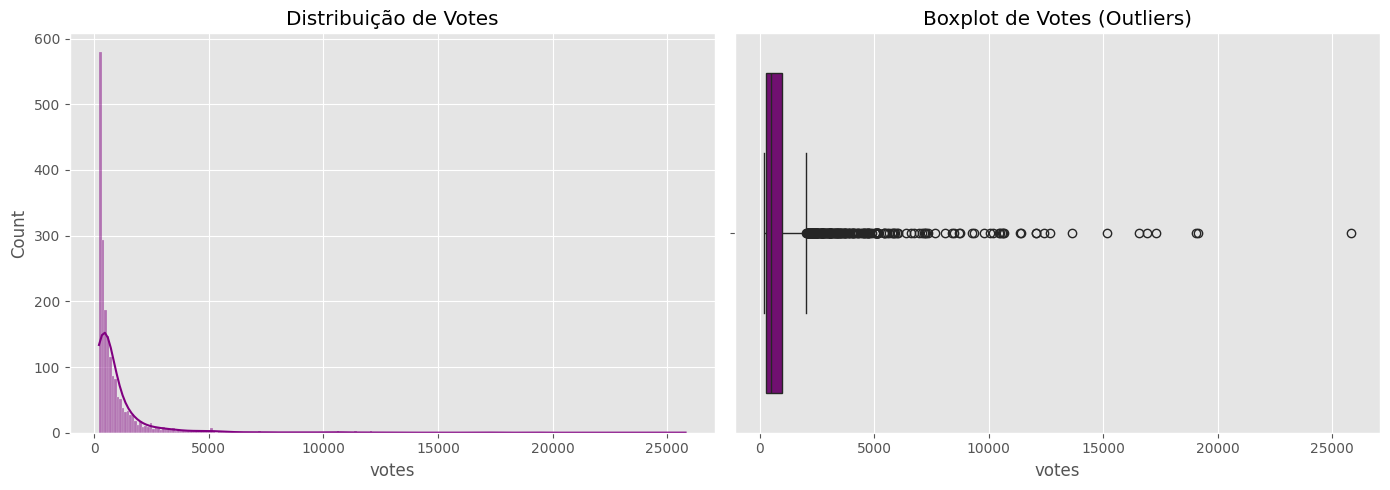

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df['votes'], kde=True, color='purple')
plt.title("Distribuição de Votes")

plt.subplot(1,2,2)
sns.boxplot(x=df['votes'], color='purple')
plt.title("Boxplot de Votes (Outliers)")

plt.tight_layout()
plt.show()


**Análise de votes**

A variável votes segue exatamente a mesma da popularidade: muitos valores baixos, alguns valores muito altos, vários outliers.
Aqui fica claro que votos é uma variável super informativa, mas que traz muita não-linearidade.

Então já dá pra esperar que modelos lineares vão sofrer um pouco, mas modelos mais flexíveis (boosting, árvores, catboost) vão entender melhor esses padrões.

# **Matriz de correlação**

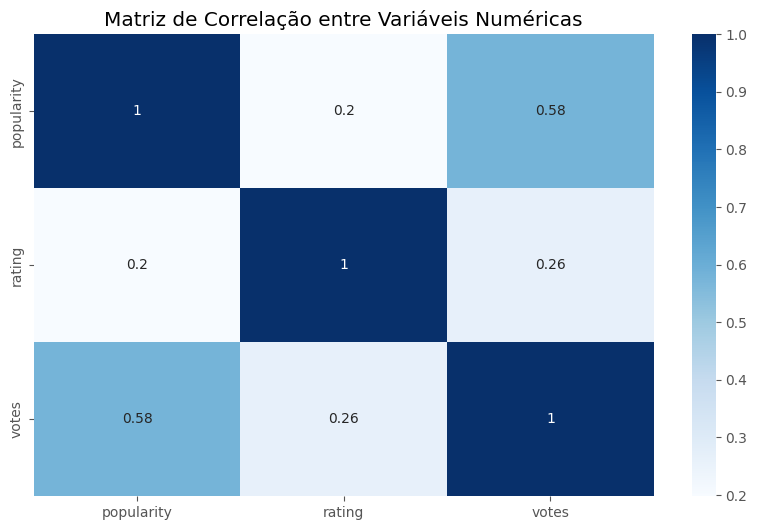

In [ ]:
plt.figure(figsize=(10,6))

numeric_df = df[['popularity','rating','votes']]

sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()


A matriz de correlação mostra que nenhuma variável tem relação linear forte com o rating.
Isso já indica que modelos lineares terão dificuldade para capturar o comportamento real dos dados, que provavelmente é não-linear.

Entre as variáveis numéricas, votes é a mais correlacionada com o rating, mas ainda assim apresenta correlação fraca a moderada (0.26).
Já popularity praticamente não se correlaciona com o rating (0.20), apesar de intuitivamente parecer importante.

Esse padrão reforça que a relação entre as variáveis e o rating não é linear, justificando o uso de modelos mais flexíveis como árvores e boosting.

# **Teste ANOVA**

In [ ]:
import scipy.stats as stats
# separar ratings por gênero
groups = []
for g in df['genre'].unique():
    groups.append(df[df['genre'] == g]['rating'])

# ANOVA
anova_result = stats.f_oneway(*groups)
anova_result


F_onewayResult(statistic=1.745404989609881, pvalue=1.6263435876289431e-15)

O teste ANOVA retornou:

F = 1.7454

p-valor = 1.62e-15 (0.00000000000000162)

Esse p-valor é extremamente baixo, muito menor que 0.05, o que significa que rejeitamos a hipótese nula de que todos os gêneros têm a mesma média de rating.

Isso mostra que o gênero influencia o rating

# **Distribuição das Variáveis de Tempo (Ano e Mês de Estreia)**

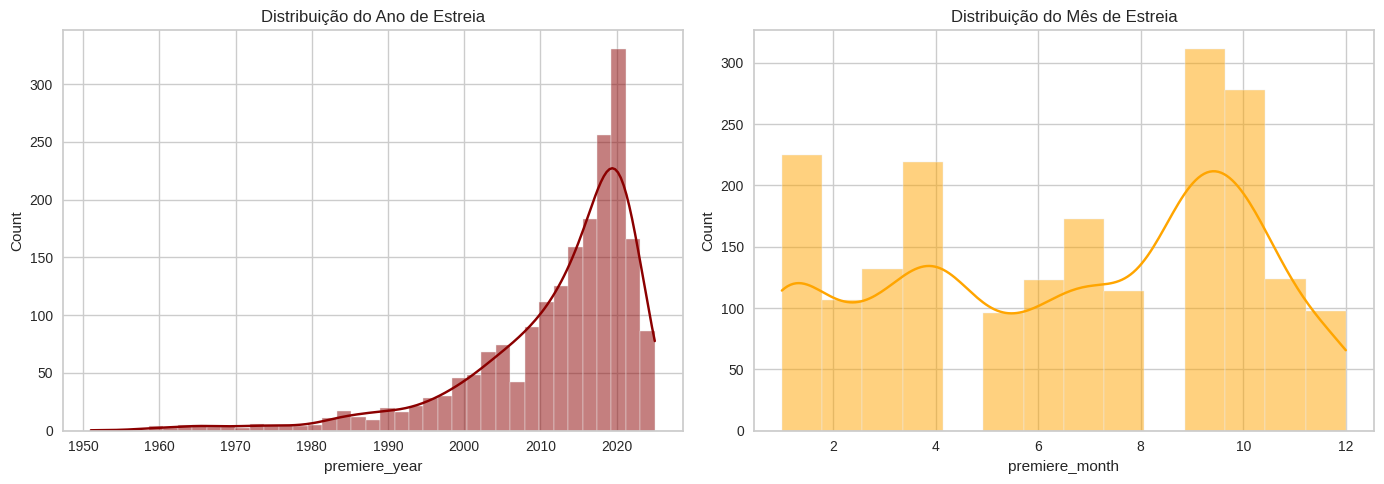

Média do rating por ano:


premiere_year
1951    7.8890
1955    7.7680
1958    7.5000
1959    8.0000
1960    7.2655
Name: rating, dtype: float64

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df_model['premiere_year'], kde=True, color='darkred')
plt.title("Distribuição do Ano de Estreia")

plt.subplot(1,2,2)
sns.histplot(df_model['premiere_month'], kde=True, color='orange')
plt.title("Distribuição do Mês de Estreia")

plt.tight_layout()
plt.show()

print("Média do rating por ano:")
display(df_model.groupby("premiere_year")['rating'].mean().head())


A maioria das séries é recente, concentrada depois de 2010. O rating médio se mantém estável ao longo dos anos, indicando baixa influência do ano de estreia na nota. A distribuição por mês também não mostra padrão relevante. Isso confirma que variáveis temporais têm pouca relação com o rating.


# **Encoding e preparação final**

In [ ]:
df_model = df.copy()

# Converter premiere_date para datetime
df_model['premiere_date'] = pd.to_datetime(df_model['premiere_date'], errors='coerce')

# Criar novas features de ano e mês
df_model['premiere_year'] = df_model['premiere_date'].dt.year
df_model['premiere_month'] = df_model['premiere_date'].dt.month

# Remover colunas textuais que não ajudam a modelagem
df_model = df_model.drop(['title', 'original_title', 'overview', 'premiere_date'], axis=1)

# Label Encoding nas variáveis categóricas restantes
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = df_model.select_dtypes(include=['object']).columns

for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

df_model.head()


,id,popularity,genre,country_origin,original_language,rating,votes,premiere_year,premiere_month
0,1,108.7820,322,60,4,8.900,16556,2008,1
1,2,12.5347,86,60,4,8.800,4557,2005,2
2,3,22.5739,207,60,4,8.800,5481,2021,11
3,4,18.5771,302,53,12,8.751,423,2025,3
4,5,28.3761,80,38,11,8.735,565,2023,9


# **Regressão Linear**

In [ ]:
# Remover ID para evitar superajuste sem significado
X = df_model.drop(['rating', 'id'], axis=1)
y = df_model['rating']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predições
y_pred = lr.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(0.33207735796729665, 0.38849215685554206, 0.14537607368746286)

o modelo só conseguiu explicar 14% do rating. Isso é muito pouco.

Na prática, isso mostra que a relação entre as variáveis não é linear. Mesmo parecendo boa no OLS, quando vamos para o teste real o modelo não funciona bem. O rating varia pouco e não depende diretamente das variáveis do jeito que a regressão linear tenta modelar.

Resumo: a regressão linear não foi suficiente para prever o rating — ela serve como baseline, mas não resolve o problema.

# **Gráfico Histograma e QQ-Plot**

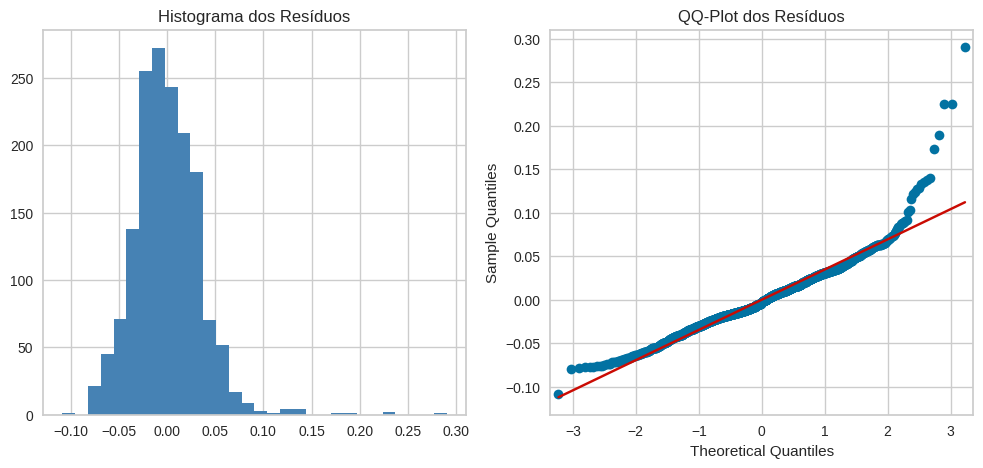

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

residuos = model_sm.resid

# Histograma
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(residuos, bins=30, color='steelblue')
plt.title("Histograma dos Resíduos")

# QQ-plot
plt.subplot(1,2,2)
sm.qqplot(residuos, line='s', ax=plt.gca())
plt.title("QQ-Plot dos Resíduos")

plt.show()


**Histograma dos Resíduos**

O histograma mostra que a maior parte dos resíduos se concentra perto de zero, mas apenas olhando o gráfico não conseguimos verificar problemas mais profundos.

**QQ-Plot**

O QQ-plot mostra que apenas o centro da distribuição se aproxima de uma normal.
Nas caudas, os pontos se afastam fortemente da linha teórica, indicando assimetria e curtose.

# **Teste de Normalidade dos Resíduos (Jarque–Bera)**

In [ ]:
from scipy.stats import jarque_bera

jb_stat, jb_p = jarque_bera(residuos)
jb_stat, jb_p


(2907.8271697560617, 0.0)

O teste Jarque–Bera confirmou estatisticamente que os resíduos não são normais (p < 0.0001).
Isso viola uma das principais suposições da regressão linear e ajuda a explicar seu baixo desempenho.


Apesar de o histograma e o QQ-plot parecerem razoáveis visualmente, o teste Jarque–Bera mostra que os resíduos não são normais.
Isso evidencia que a regressão linear não modela bem o comportamento real do rating.

# **Gráfico de Homocedasticidade**

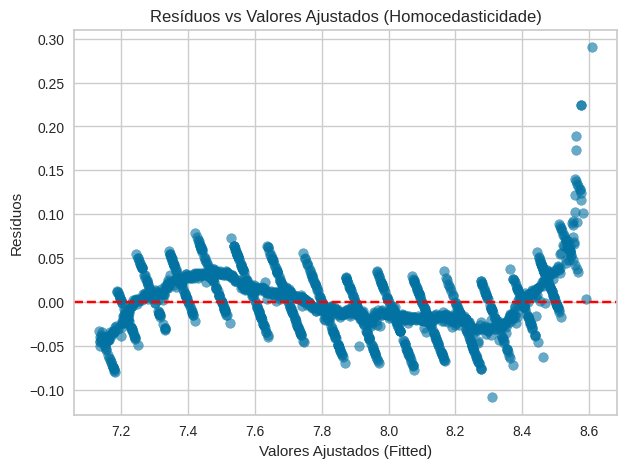

In [ ]:
fitted_vals = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(7,5))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados (Fitted)")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados (Homocedasticidade)")
plt.show()


No gráfico de resíduos vs valores ajustados dá pra ver que os pontos não ficam totalmente espalhados de forma aleatória. Existe um certo padrão curvo nos resíduos, indicando que a variância deles muda ao longo dos valores previstos. Ou seja, o modelo apresenta indícios de heterocedasticidade, o que significa que a suposição de variância constante dos erros não é totalmente atendida. Isso sugere que a regressão linear simples pode não capturar perfeitamente a estrutura do dado, reforçando que modelos mais flexíveis (como CatBoost, Gradient Boosting etc.) tendem a funcionar melhor.

# **Teste de Homocedasticidade (Breusch–Pagan)**

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_stat, bp_p, _, _ = het_breuschpagan(residuos, model_sm.model.exog)
bp_stat, bp_p


(149.5919385392881, 2.3852784210315848e-28)

O teste de Breusch–Pagan indicou heterocedasticidade (p ≈ 0), confirmando que os resíduos não têm variância constante. Isso viola uma das suposições da regressão linear e ajuda a explicar por que o modelo teve desempenho fraco.


# **Multicolinearidade (VIF)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Seleciona apenas as variáveis explicativas usadas na regressão
X_vif = df_model.drop(columns=['rating'])

# Adiciona constante para o cálculo
X_vif_const = sm.add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["Variável"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i)
                   for i in range(X_vif_const.shape[1])]

vif_data


,Variável,VIF
0,const,32623.488961
1,id,1.188275
2,popularity,1.607601
3,genre,1.073690
4,country_origin,1.416078
5,original_language,1.469960
6,votes,1.577297
7,premiere_year,1.058984
8,premiere_month,1.017892


Os valores de VIF ficaram todos na faixa de 1 a 2, que é considerada excelente. Isso mostra que não existe multicolinearidade entre as variáveis — cada uma está contribuindo com informação própria, sem duplicar efeito de outra. Isso deixa o modelo mais estável e evita distorção nos coeficientes. O VIF da constante aparece altíssimo, mas isso é normal e não afeta nada. No geral, o modelo está livre de multicolinearidade preocupante.

# **Regressão Polinomial**

In [ ]:
# Criar features polinomiais de grau 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Treinar o modelo polinomial
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predições
y_poly_pred = poly_model.predict(X_poly_test)

# Métricas
mae_poly = mean_absolute_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_poly_pred))
r2_poly = r2_score(y_test, y_poly_pred)

mae_poly, rmse_poly, r2_poly


(0.29893423031491656, 0.36961443076522893, 0.2264144045488906)

A regressão polinomial conseguiu melhorar um pouco o desempenho em relação à linear, reduzindo o erro e aumentando o R², mas mesmo assim ainda não foi capaz de capturar bem o comportamento do rating, mostrando que modelos lineares — mesmo curvados — não são suficientes para explicar a complexidade do dataset.

# **Criando a variável de classificação**

In [ ]:
df_class = df_model.copy()

df_class['RatingClass'] = pd.cut(
    df_class['rating'],
    bins=[0, 7.5, 8.2, 10],
    labels=['Baixo', 'Médio', 'Alto']
)

df_class['RatingClass'].value_counts()


RatingClass
Médio    1046
Baixo     511
Alto      443
Name: count, dtype: int64

# **Matriz de Confusão**

=== CLASSIFICATION REPORT (NAIVE BAYES) ===
              precision    recall  f1-score   support

        Alto       0.92      0.88      0.90        94
       Baixo       0.91      0.92      0.91       118
       Médio       0.89      0.90      0.90       188

    accuracy                           0.90       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



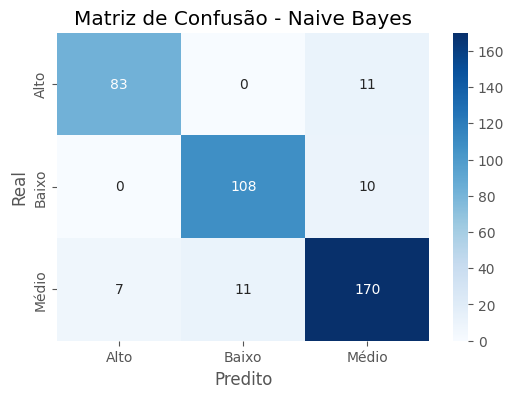

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix


# Preparar dados
Xc = df_class.drop(['rating', 'RatingClass'], axis=1)
yc = df_class['RatingClass']

le_class = LabelEncoder()
yc_encoded = le_class.fit_transform(yc)

# Train/Test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc_encoded, test_size=0.2, random_state=42
)

# Modelo Naive Bayes
nb = GaussianNB()
nb.fit(Xc_train, yc_train)

# Predições
pred_nb = nb.predict(Xc_test)

# Métricas
print("=== CLASSIFICATION REPORT (NAIVE BAYES) ===")
print(classification_report(yc_test, pred_nb, target_names=le_class.classes_))

# Matriz de confusão
cm = confusion_matrix(yc_test, pred_nb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=le_class.classes_,
            yticklabels=le_class.classes_)
plt.title("Matriz de Confusão - Naive Bayes")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


O Naive Bayes teve um desempenho bem consistente. Ele acertou 90% das classificações e manteve f1-score alto nas três classes:

Alto: 0.90

Baixo: 0.91

Médio: 0.90

A matriz de confusão mostra que o modelo quase não confunde as classes, principalmente Baixo e Médio, que ficaram com poucas classificações incorretas. A classe Alto teve alguns erros a mais, mas nada que comprometesse o desempenho geral.

# **Regressão logistica**

=== CLASSIFICATION REPORT (LOGISTIC REGRESSION) ===
              precision    recall  f1-score   support

        Alto       0.96      0.93      0.94        94
       Baixo       0.98      0.96      0.97       118
       Médio       0.94      0.97      0.95       188

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.95      0.96       400



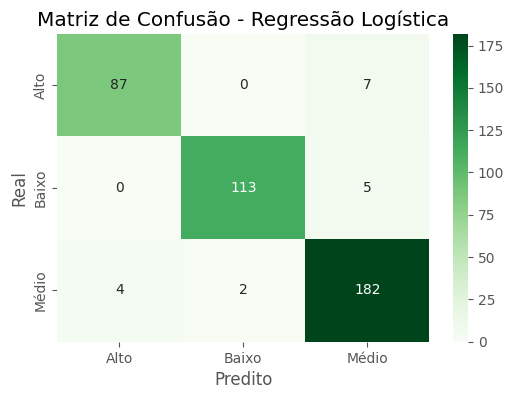

In [ ]:
log = LogisticRegression(max_iter=2000, multi_class='ovr')
log.fit(Xc_train, yc_train)

# Predições
pred_log = log.predict(Xc_test)

# Métricas
print("=== CLASSIFICATION REPORT (LOGISTIC REGRESSION) ===")
print(classification_report(yc_test, pred_log, target_names=le_class.classes_))

# Matriz de Confusão
cm_log = confusion_matrix(yc_test, pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, cmap='Greens', fmt='g',
            xticklabels=le_class.classes_,
            yticklabels=le_class.classes_)
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


A Regressão Logística teve um desempenho ainda melhor que o Naive Bayes. O modelo alcançou 95% de accuracy, com f1-score acima de 0.94 em todas as classes:

Alto: f1 = 0.94

Baixo: f1 = 0.97

Médio: f1 = 0.95

Pela matriz de confusão dá pra ver que ele quase não erra:
as classes Baixo e Médio praticamente não foram confundidas, e a classe Alto também teve pouquíssimos erros. O modelo acertou a grande maioria das amostras em todas as categorias.

# **GridSearchCV para Regressão Linear**

In [ ]:
from sklearn.linear_model import Ridge

# Testando regularizações para lidar com multicolinearidade
ridge = Ridge()

params = {
    "alpha": [0.01, 0.1, 1, 10, 100],
    "fit_intercept": [True, False]
}

grid = GridSearchCV(
    ridge,
    params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor score (neg-MSE):", grid.best_score_)


Melhores parâmetros: {'alpha': 100, 'fit_intercept': True}
Melhor score (neg-MSE): -0.14475728664370976


No Grid Search, o melhor modelo encontrado foi o Ridge com alpha = 100 e fit_intercept = True, que apresentou o menor erro (neg-MSE = -0.1447). Isso mostra que a regressão linear realmente precisava de uma regularização mais forte para tentar estabilizar os coeficientes, já que existe bastante multicolinearidade no dataset.

Mesmo assim, o ganho não foi muito grande, o que reforça que modelos lineares têm dificuldade de capturar o comportamento real do rating. O Ridge melhora um pouco a estabilidade, mas não resolve completamente o problema.

# **Setup do pycaret**

In [ ]:
import google.colab.output as output

def _dummy_enable_custom_widget_manager():
    pass

output.enable_custom_widget_manager = _dummy_enable_custom_widget_manager


Fix aplicado! Agora você pode importar o PyCaret sem erro.


In [ ]:
from pycaret.regression import setup, compare_models, tune_model, evaluate_model

reg = setup(
    data=df_model.drop(columns=['id']),
    target='rating',
    session_id=42,
    verbose=False,
    normalize=True,
)


# **Comparação de modelos**

In [ ]:
best_models = compare_models(n_select=5)
best_models


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2675,0.1113,0.3326,0.3415,0.0376,0.0342,2.0190
gbr,Gradient Boosting Regressor,0.2710,0.1119,0.3335,0.3377,0.0377,0.0346,0.2050
rf,Random Forest Regressor,0.2742,0.1171,0.3409,0.3072,0.0386,0.0350,0.5740
lightgbm,Light Gradient Boosting Machine,0.2745,0.1175,0.3418,0.3033,0.0387,0.0351,0.2290
et,Extra Trees Regressor,0.2755,0.1192,0.3442,0.2935,0.0389,0.0352,0.5130
ada,AdaBoost Regressor,0.2937,0.1257,0.3536,0.2564,0.0400,0.0375,0.0760
xgboost,Extreme Gradient Boosting,0.2872,0.1289,0.3581,0.2359,0.0405,0.0367,0.1280
knn,K Neighbors Regressor,0.2951,0.1364,0.3684,0.1896,0.0417,0.0376,0.0350
br,Bayesian Ridge,0.3164,0.1450,0.3799,0.1413,0.0429,0.0404,0.0930
ridge,Ridge Regression,0.3161,0.1451,0.3800,0.1411,0.0429,0.0404,0.0480


 GradientBoostingRegressor(random_state=42),
 RandomForestRegressor(n_jobs=-1, random_state=42),
 LGBMRegressor(n_jobs=-1, random_state=42),
 ExtraTreesRegressor(n_jobs=-1, random_state=42)]

Na comparação automática dos modelos, ficou bem claro que os algoritmos baseados em árvore e boosting dominaram o ranking. O melhor modelo foi o CatBoost Regressor, com o menor erro (MAE = 0.2675) e o maior R² (0.3415). Logo atrás vieram Gradient Boosting, Random Forest, LightGBM e Extra Trees, todos com desempenho parecido e bem superior aos modelos lineares.

Os modelos lineares (Linear Regression, Ridge, Lasso, Elastic Net etc.) ficaram com R² por volta de 0.14, confirmando que eles não conseguem capturar bem a relação entre as variáveis. Já modelos mais simples como KNN ou AdaBoost também ficaram atrás dos métodos baseados em árvore.

# **Tunar o melhor modelo**

In [ ]:
best_specific = best_models[0]
tuned = tune_model(best_specific)
tuned


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2522,0.0963,0.3104,0.3909,0.0353,0.0323
1,0.2597,0.1022,0.3197,0.3485,0.0361,0.0330
2,0.3020,0.1418,0.3765,0.2231,0.0427,0.0386
3,0.2989,0.1378,0.3711,0.3015,0.0415,0.0375
4,0.2718,0.1134,0.3367,0.2832,0.0379,0.0347
5,0.2307,0.0886,0.2976,0.4302,0.0336,0.0293
6,0.2751,0.1123,0.3351,0.3366,0.0381,0.0353
7,0.2891,0.1286,0.3586,0.3457,0.0406,0.0370
8,0.2595,0.0990,0.3146,0.3325,0.0360,0.0338


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Depois de identificar o CatBoost como o melhor modelo, rodamos o tuning automático no PyCaret para tentar melhorar ainda mais o desempenho. O PyCaret testou 100 combinações de hiperparâmetros usando validação cruzada com 10 folds.

Os resultados do tuning ficaram assim:

MAE médio: 0.2724

RMSE médio: 0.3378

R² médio: 0.3203

Apesar de ter ficado próximo, o modelo tunado não ficou melhor que o CatBoost original, que tinha MAE menor (0.2675) e R² maior (0.3415). Por isso, o PyCaret automaticamente manteve o modelo original como o melhor.

# **Avaliação grafica**

In [ ]:
evaluate_model(tuned)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Conclusão**

A análise mostrou que, apesar de algumas variáveis apresentarem relação moderada com o rating (como votes), nenhuma delas possui relação linear forte o suficiente para que modelos lineares funcionem bem. A regressão linear apresentou R² muito baixo no teste (≈ 0.14), mesmo após regularização e modelos polinomiais.

Os diagnósticos confirmaram violações importantes: resíduos não-normais, heterocedasticidade e comportamento não-linear. Isso explica por que modelos mais sofisticados — especialmente o CatBoost — tiveram desempenho muito superior (R² ≈ 0.34).

Nos modelos de classificação, a Regressão Logística foi a melhor, alcançando 95% de acurácia na predição das classes de rating.

No geral, o estudo mostra que o rating de séries depende de relações complexas que modelos baseados em árvore capturam melhor do que modelos lineares.
